# Time series analysis with AR model on airline passenger dataset.

In [1]:
%matplotlib inline
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa import seasonal, stattools, ar_model, arima_model
from statsmodels.graphics import tsaplots
from sklearn.metrics import mean_squared_error

C:\Users\michaelhsieh\AppData\Local\conda\conda\envs\DeepLearning\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Data available at kaggle: https://www.kaggle.com/rakannimer/air-passengers/data

In [2]:
df=pd.read_csv('../Data/AirPassengers.csv', parse_dates=True, 
               index_col=0)

In [3]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.shape

(144, 1)

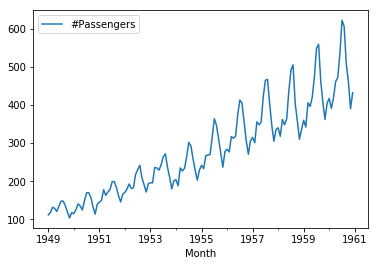

In [5]:
df.plot()

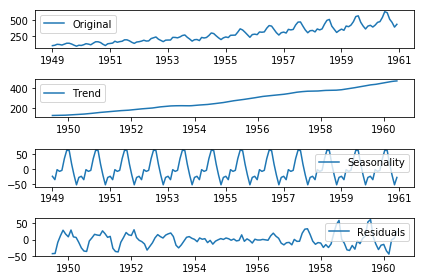

In [6]:
decomp=seasonal.seasonal_decompose(df)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [8]:
out=stattools.acf(df, qstat=True, alpha=0.05)

<Container object of 41 artists>

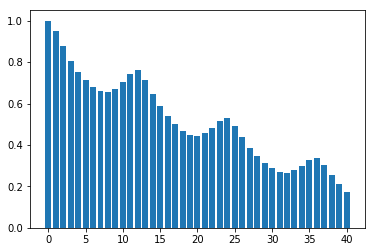

In [9]:
plt.bar(range(0, out[0].shape[0]), out[0])

the decay in the acf plot suggests the timeseries is non-stationary and needs to be differenced.

In [10]:
out_resid=stattools.acf(residual.dropna(), qstat=True, alpha=0.05)

<Container object of 41 artists>

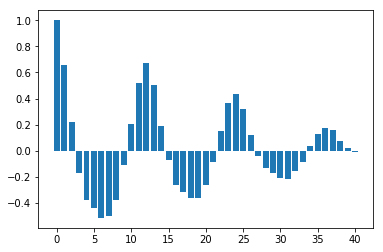

In [11]:
plt.bar(range(0, out_resid[0].shape[0]), out_resid[0])

Positive autocorrelation in lag-1 -> AR terms should be used.
Negative in lag-1 -> Use MA.

Let's try one differencing.

In [12]:
df['1st_diff']=df-df.shift()
df['2nd_diff']=df['1st_diff']-df['1st_diff'].shift()

In [13]:
acf_1st=stattools.acf(df['1st_diff'].dropna())
acf_2nd=stattools.acf(df['2nd_diff'].dropna())

Text(0.5,1,'ACF: 2nd difference')

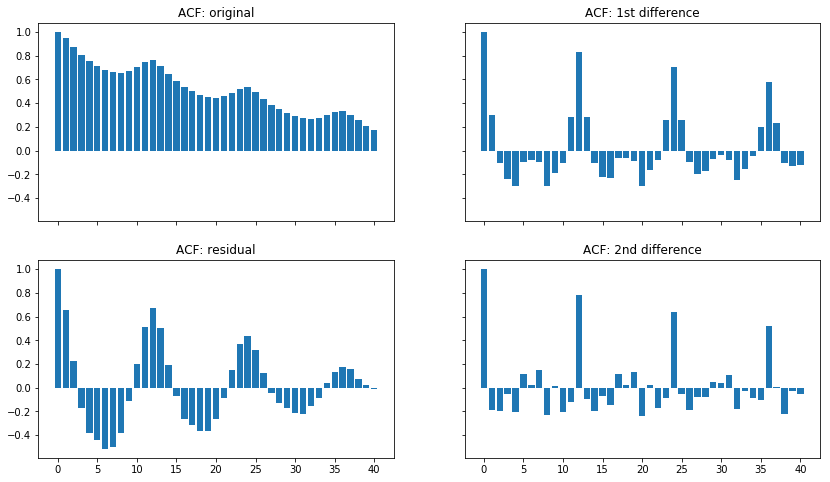

In [14]:
f, ax=plt.subplots(2,2, figsize=(14,8), sharex=True, sharey=True)

ax[0][0].bar(range(0, out[0].shape[0]), out[0])
ax[0][0].set_title('ACF: original')

ax[1][0].bar(range(0, out_resid[0].shape[0]), out_resid[0])
ax[1][0].set_title('ACF: residual')

ax[0][1].bar(range(0, acf_1st.shape[0]), acf_1st)
ax[0][1].set_title('ACF: 1st difference')

ax[1][1].bar(range(0, acf_2nd.shape[0]), acf_2nd)
ax[1][1].set_title('ACF: 2nd difference')

In [17]:
pacf_orig = stattools.pacf(df['#Passengers'], method='ols')
pacf_resid = stattools.pacf(residual.dropna(), method='ols')
pacf_1st = stattools.pacf(df['1st_diff'].dropna(), method='ols')
pacf_2nd = stattools.pacf(df['2nd_diff'].dropna(), method='ols')

Text(0.5,1,'PACF: 2nd difference')

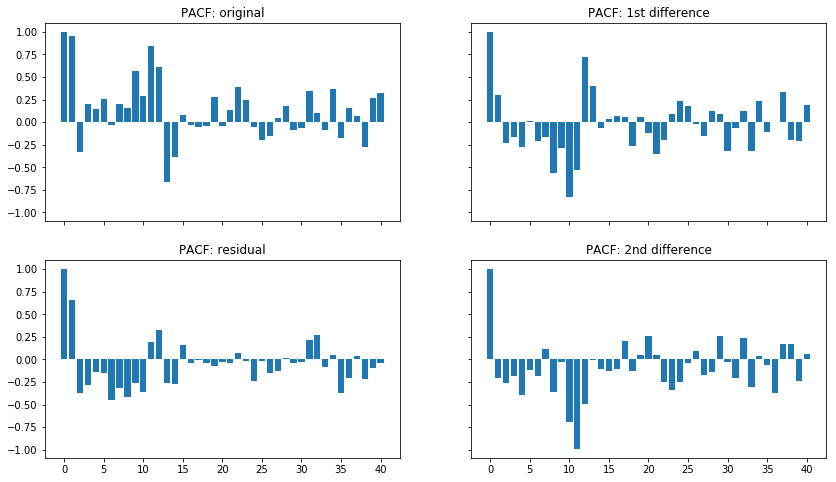

In [18]:
f, ax=plt.subplots(2,2, figsize=(14,8), sharex=True, sharey=True)

ax[0][0].bar(range(0, pacf_orig.shape[0]), pacf_orig)
ax[0][0].set_title('PACF: original')

ax[1][0].bar(range(0, pacf_resid.shape[0]), pacf_resid)
ax[1][0].set_title('PACF: residual')

ax[0][1].bar(range(0, pacf_1st.shape[0]), pacf_1st)
ax[0][1].set_title('PACF: 1st difference')

ax[1][1].bar(range(0, pacf_2nd.shape[0]), pacf_2nd)
ax[1][1].set_title('PACF: 2nd difference')

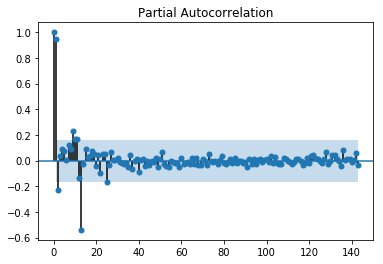

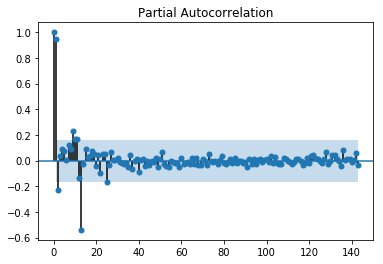

In [19]:
f, ax=plt.subplots(1,1)
tsaplots.plot_pacf(df['#Passengers'], ax=ax)

In [20]:
model=ar_model.AR(df['#Passengers'], dates=df.index)
result=model.fit()

In [21]:
n_passenger_100_150=result.predict(start=100, end=150)
n_passenger_100_200=result.predict(start=100, end=200)

In [22]:
n_passenger_100_150

1957-05-01    357.446287
1957-06-01    415.630685
1957-07-01    462.868803
1957-08-01    451.714666
1957-09-01    409.981678
1957-10-01    345.736886
1957-11-01    306.292166
1957-12-01    342.272100
1958-01-01    343.673941
1958-02-01    327.051926
1958-03-01    376.043360
1958-04-01    363.658085
1958-05-01    372.575113
1958-06-01    443.779172
1958-07-01    492.938568
1958-08-01    496.439673
1958-09-01    443.801368
1958-10-01    351.342446
1958-11-01    322.871609
1958-12-01    351.347202
1959-01-01    349.246823
1959-02-01    340.261937
1959-03-01    386.760714
1959-04-01    391.081719
1959-05-01    417.139026
1959-06-01    489.412938
1959-07-01    538.423980
1959-08-01    555.224142
1959-09-01    454.299369
1959-10-01    406.619911
1959-11-01    348.238203
1959-12-01    389.252317
1960-01-01    414.045460
1960-02-01    393.704279
1960-03-01    444.648005
1960-04-01    419.398480
1960-05-01    487.662243
1960-06-01    523.982713
1960-07-01    615.354765
1960-08-01    619.989699


In [23]:
df.tail()

,#Passengers,1st_diff,2nd_diff
Month,,,
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0
1960-11-01,390,-71.0,-24.0
1960-12-01,432,42.0,113.0


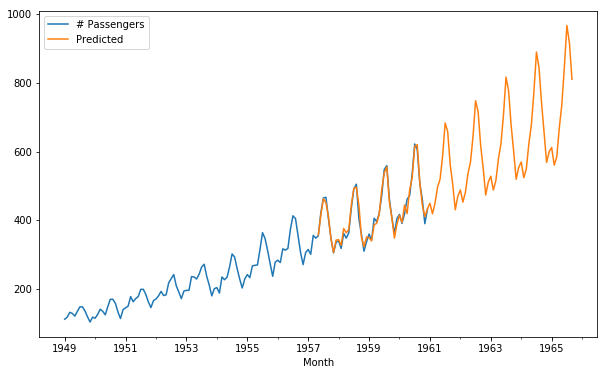

In [24]:
plt.figure(figsize=(10,6))
df['#Passengers'].plot(label='# Passengers')
n_passenger_100_200.plot(label='Predicted')
plt.legend()
#plt.xlim(n_passenger_100_200.index.min(), n_passenger_100_200.index.max())

In [50]:
train=df['#Passengers'].head(96)
model2=ar_model.AR(train, dates=train.index)
result2=model2.fit()
predicted=result2.predict(start=96, end=144, 
                          dynamic=True)

In [57]:
print(result2.summary())

None


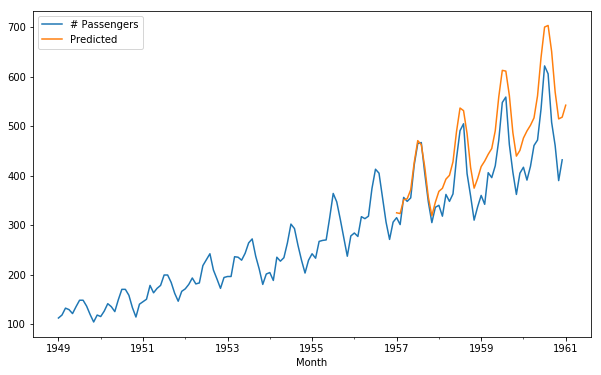

In [55]:
plt.figure(figsize=(10,6))
df['#Passengers'].plot(label='# Passengers')
predicted.plot(label='Predicted')
plt.legend()

In [52]:
predicted.shape

(49,)

In [53]:
rmse = np.sqrt(mean_squared_error(df['#Passengers'].values[95:], predicted))
print(rmse)

77.9594468617792


RMSE 46 is slightly better than LSTM-RNN model example in https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

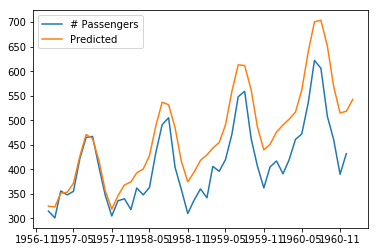

In [32]:
plt.plot(df['#Passengers'].tail(48),label='# Passengers')
plt.plot(predicted, label='Predicted')
plt.legend()

In [33]:
df.head()

,#Passengers,1st_diff,2nd_diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [34]:
train=df['1st_diff'].dropna().head(96)
model3=ar_model.AR(train, dates=train.index)
result3=model3.fit()
predicted=result3.predict(start=96, end=144)

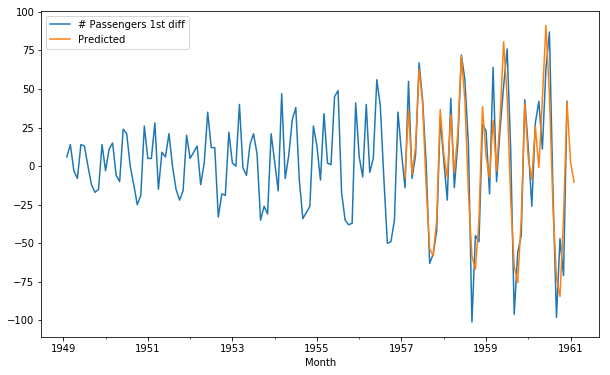

In [36]:
plt.figure(figsize=(10,6))
df['1st_diff'].plot(label='# Passengers 1st diff')
predicted.plot(label='Predicted')
plt.legend()

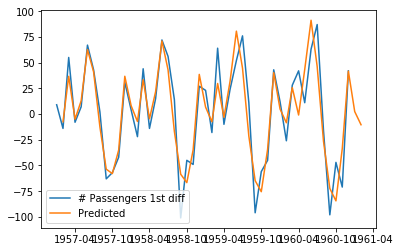

In [37]:
plt.plot(df['1st_diff'].tail(48),label='# Passengers 1st diff')
plt.plot(predicted, label='Predicted')
plt.legend()

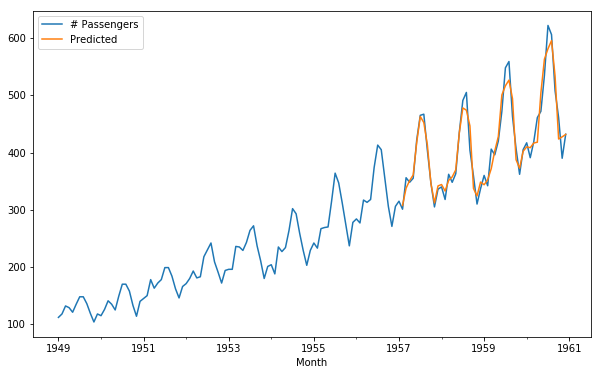

In [44]:
plt.figure(figsize=(10,6))
df['#Passengers'].plot(label='# Passengers')
(df['#Passengers'].shift()+predicted).plot(label='Predicted')
plt.legend()

In [40]:
df['#Passengers'].shift()+predicted

1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01           NaN
1950-01-01           NaN
1950-02-01           NaN
1950-03-01           NaN
1950-04-01           NaN
1950-05-01           NaN
1950-06-01           NaN
1950-07-01           NaN
1950-08-01           NaN
1950-09-01           NaN
1950-10-01           NaN
1950-11-01           NaN
1950-12-01           NaN
1951-01-01           NaN
1951-02-01           NaN
1951-03-01           NaN
1951-04-01           NaN
1951-05-01           NaN
1951-06-01           NaN
                 ...    
1958-09-01    446.479610
1958-10-01    337.315329
1958-11-01    324.179856
1958-12-01    348.528394
1959-01-01    343.737091
1959-02-01    352.501630
1959-03-01    371.692062
1959-04-01    402.809429
1959-05-01    427.857483


In [42]:
predicted.head(), predicted.tail()

(1957-02-01    -7.493447
 1957-03-01    36.677589
 1957-04-01    -5.014359
 1957-05-01    12.800251
 1957-06-01    62.721837
 Freq: MS, dtype: float64, 1960-10-01   -84.423397
 1960-11-01   -33.594769
 1960-12-01    41.654561
 1961-01-01     2.385456
 1961-02-01   -10.416328
 Freq: MS, dtype: float64)

In [43]:
df['#Passengers'].head(), df['#Passengers'].tail()

(Month
 1949-01-01    112
 1949-02-01    118
 1949-03-01    132
 1949-04-01    129
 1949-05-01    121
 Name: #Passengers, dtype: int64, Month
 1960-08-01    606
 1960-09-01    508
 1960-10-01    461
 1960-11-01    390
 1960-12-01    432
 Name: #Passengers, dtype: int64)